
<div style="text-align:center;line-height:300%;">
<font face="XB Zar" size=7>
<h4>Machine Learning Project</h4>
  </font>
</div>


<div style="text-align:center;direction:ltr;line-height:300%;">
<font face="XB Zar" size=3>
<h1> AIVengers  </h1>
  </font>
</div>
<div style="text-align:center;direction:ltr;line-height:300%;">
<font face="XB Zar" size=3>
<h1> EEG valence classification  </h1>
  </font>
</div>






## Project description


**Objective**:


The objective of this project is to design a machine learning model that can classify the valence (positive or negative) of EEG channel features. The dataset consists of features such as PSD (Power Spectral Density) and PLV (Phase Locking Value) extracted from EEG signals .

note : you don't need to know what exactly these PLV and PSD are , just use them as some features for classification task.

**Dataset**:


The dataset contains a collection of EEG channel features, including PSD and PLV features. Each sample in the dataset represents a specific EEG recording, and the corresponding label indicates the valence (positive(1) or negative(0)) associated with that recording.

**Recommended Approach**:
1. Data Preprocessing:
    - Load the dataset and perform any necessary data cleaning such as handling missing values , data normalization, data balancing.
        - handling missing values
            1. Drop the rows with missing values: This is the simplest solution, but it can result in a significant loss of data.
            2. Drop the columns with missing values: If a particular feature has a lot of missing values, you may choose to drop the entire column instead of imputing the missing values.
            3. `Impute missing values with mean, median, or mode`: This involves replacing missing values with a summary statistic, such as the mean, median, or mode of the feature. This is a common approach for numerical data.
        - Data normalization is a process of organizing data in a database in such a way that it reduces redundancy and dependency among different tables. It is a technique to create modular, scalable, and maintainable database structures. The basic idea behind normalization is to divide a larger table into smaller tables and define relationships between them. This helps to eliminate data redundancies and inconsistencies which can lead to data anomalies and make it difficult to update, delete or insert data. A well-normalized database ensures data integrity and accuracy and makes it easier to query and analyze data.
            - `Data normalization with z-score`, also known as standardization, is a statistical process of rescaling a dataset so that it has a mean of 0 and a standard deviation of 
            - more information : https://www.statology.org/z-score-normalization/
        - There are many approaches to random resampling for imbalanced classification
            1. Random Oversampling: Randomly duplicate examples in the minority class.
            2. Random `Undersampling`: Randomly delete examples in the majority class
            - `smote-oversampling` : https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

2. Feature Selection:
    - Select the most informative features using techniques like 
        1. Recursive Feature Elimination (RFE): This method eliminates features iteratively by training a model and removing the least important feature until a specified number of features is reached.
        2. Correlation-based Feature Selection (CFS): This method removes features that are highly correlated with one another, prioritizing features that are highly correlated with the target variable.
        3. Principal Component Analysis (PCA): This method creates new features that are linear combinations of the original features while maximizing the variance in the data. It selects the new features which explain the most variance in the data.
        4. Tree-based Feature Selection: This method is based on decision trees and uses feature importance scores to select the most important features.
        5. Mutual Information-based Selection: This method measures the level of dependence between features and the target variable to select the most informative features.
        6. L1 Regularization: This method penalizes high-valued coefficients in a linear model to force them to zero. This results in sparse coefficients and selects only the most important features.
    - is it recommended to use `fisher feature selection` :
        - Fisher feature selection is a method for selecting a subset of relevant features in a dataset that are most discriminative for classification tasks. It is based on the Fisher's discriminant ratio, which measures the separation between classes in terms of the means and variances of the feature values. Essentially, it calculates the ratio of the between-class variance to the within-class variance for each feature and selects the subset of features with the highest ratio.
3. Model Selection and Training:
    - Split the dataset into training and testing sets to evaluate the model's performance.
    - Choose atleast `3` classical machine learning algorithms such as `Support Vector Machines (SVM), Logistic Regression (LR), Random Forest, Multi-layer Perceptron classifie(MLP), Gaussian naive bayes`, etc.
    - Train each model using the training dataset and tune hyperparameters if necessary.


4. Model Evaluation:
    - Use the selected model to predict the valence of EEG channel features in the testing dataset.
    - Evaluate the model's performance on the testing dataset using evaluation metrics such as accuracy, precision, recall, and F1-score.
    - optional : use cross-validation evaluation 
   

5. Model Comparison and Selection:
    - Compare the performance of different models based on evaluation metrics.
    - Select the best-performing model for valence classification.




---

Import needed libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns 

load dataset :

In [2]:

df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,valence,subject,epoch,Fpz,Fp1,Fp2,AF3,AF4,AF7,AF8,...,POz_NE,PO3_NE,PO4_NE,PO5_NE,PO6_NE,PO7_NE,PO8_NE,Oz_NE,O1_NE,O2_NE
0,1,02wxw,0,2.460000e-10,3.270000e-10,3.300000e-10,1.940000e-10,2.150000e-10,3.850000e-10,3.880000e-10,...,16.512890,16.322085,16.447947,16.293350,16.249097,16.419212,16.423235,16.403695,16.384729,16.364039
1,0,02wxw,1,2.460000e-10,5.070000e-10,5.350000e-10,2.030000e-10,2.300000e-10,5.810000e-10,8.070000e-10,...,11.548358,11.261207,11.408580,11.252011,11.325246,11.919253,11.919253,11.850287,11.867529,11.867529
2,0,02wxw,2,1.890000e-10,5.080000e-10,4.450000e-10,1.810000e-10,2.190000e-10,5.590000e-10,5.100000e-10,...,12.458292,12.171634,12.337397,12.048071,12.111289,12.229926,12.813013,12.744048,12.761289,12.761289
3,0,02wxw,3,2.580000e-10,3.040000e-10,NaN,2.210000e-10,1.860000e-10,2.780000e-10,3.300000e-10,...,16.372802,16.203262,16.205041,16.000443,15.994696,16.141767,16.190043,16.292342,16.310759,16.130328
4,0,02wxw,4,1.860000e-10,NaN,4.180000e-10,1.590000e-10,1.990000e-10,3.350000e-10,6.460000e-10,...,13.401519,12.691174,12.915558,12.638875,NaN,12.862438,12.898317,12.966133,12.830829,13.063711


### removing redundant columns :

In [4]:
df.drop(['epoch', 'subject'], axis=1, inplace=True)
df.head()

,valence,Fpz,Fp1,Fp2,AF3,AF4,AF7,AF8,Fz,F1,...,POz_NE,PO3_NE,PO4_NE,PO5_NE,PO6_NE,PO7_NE,PO8_NE,Oz_NE,O1_NE,O2_NE
0,1,2.460000e-10,3.270000e-10,3.300000e-10,1.940000e-10,2.150000e-10,3.850000e-10,3.880000e-10,2.370000e-10,1.640000e-10,...,16.512890,16.322085,16.447947,16.293350,16.249097,16.419212,16.423235,16.403695,16.384729,16.364039
1,0,2.460000e-10,5.070000e-10,5.350000e-10,2.030000e-10,2.300000e-10,5.810000e-10,8.070000e-10,1.580000e-10,NaN,...,11.548358,11.261207,11.408580,11.252011,11.325246,11.919253,11.919253,11.850287,11.867529,11.867529
2,0,1.890000e-10,5.080000e-10,4.450000e-10,1.810000e-10,2.190000e-10,5.590000e-10,5.100000e-10,1.920000e-10,1.540000e-10,...,12.458292,12.171634,12.337397,12.048071,12.111289,12.229926,12.813013,12.744048,12.761289,12.761289
3,0,2.580000e-10,3.040000e-10,NaN,2.210000e-10,1.860000e-10,2.780000e-10,3.300000e-10,1.650000e-10,1.730000e-10,...,16.372802,16.203262,16.205041,16.000443,15.994696,16.141767,16.190043,16.292342,16.310759,16.130328
4,0,1.860000e-10,NaN,4.180000e-10,1.590000e-10,1.990000e-10,3.350000e-10,6.460000e-10,1.760000e-10,1.240000e-10,...,13.401519,12.691174,12.915558,12.638875,NaN,12.862438,12.898317,12.966133,12.830829,13.063711


### missing value haandling :


hint : you can use `pd.fillna()` method. 

In [5]:
def missing_value_handler(df):
    """
    Args:
        df (pandas.DataFrame): input DataFrame
    
    return:
        new_df (pandas.DataFrame): output DataFrame
    """
    new_df = df.copy()
    number_of_rows = len(new_df.index)
    number_of_columns = len(new_df.columns)


    new_df.dropna(axis=1, thresh=0.2*number_of_rows, inplace=True)
    new_df.dropna(thresh=0.5*number_of_columns, inplace=True)


    for column in new_df.columns:
        if(df[column].dtype != 'O'):
            new_df[column].fillna(value=new_df[column].mean(), inplace=True)

    return new_df

In [6]:
df.isnull().sum().sum()

67

In [7]:
missing_value_handler(df).isnull().sum().sum()

0

### Data normalization :

hint: you can use `sklearn.preprocessing.StandardScaler` method.


In [8]:
def encoder(df):

    categorized_df = df.copy()
    label_encoder = LabelEncoder()

    for column in categorized_df.columns:
        if(categorized_df[column].dtype == 'O'):
            categorized_df[column] = label_encoder.fit_transform(categorized_df[column])
    
    return categorized_df
    

In [9]:
def normalizer(df):

    normalized_dataset = df.copy()
    normalized_dataset = encoder(normalized_dataset)
    standard_scaler = StandardScaler()
    minimax_scaler = MinMaxScaler()
    numerical_columns = [column for column in normalized_dataset.columns[1:] if normalized_dataset[column].dtype != 'O']

    standard_scaler_columns = [column for column in numerical_columns if len(normalized_dataset[column].unique()) > 30]
    minimax_scaler_columns = [column for column in numerical_columns if len(normalized_dataset[column].unique()) <= 30]

    minimax_scaled_columns = minimax_scaler.fit_transform(normalized_dataset[minimax_scaler_columns])
    normalized_dataset[minimax_scaler_columns] = minimax_scaled_columns

    standard_scaled_columns = standard_scaler.fit_transform(normalized_dataset[standard_scaler_columns])
    normalized_dataset[standard_scaler_columns] = standard_scaled_columns
    
    return normalized_dataset

In [10]:
normalizer(missing_value_handler(df)).head()

,valence,Fpz,Fp1,Fp2,AF3,AF4,AF7,AF8,Fz,F1,...,POz_NE,PO3_NE,PO4_NE,PO5_NE,PO6_NE,PO7_NE,PO8_NE,Oz_NE,O1_NE,O2_NE
0,1,-0.423165,-6.057874e-01,-5.734662e-01,-0.500007,-0.401138,-0.491678,-0.468914,0.620719,-0.243394,...,0.019342,0.024959,0.038193,0.050286,0.032108,0.064969,0.040938,0.010701,0.036298,0.007060
1,0,-0.423165,-4.649070e-01,-4.533364e-01,-0.482284,-0.376234,-0.347845,-0.243932,0.071365,0.000000,...,-1.006514,-1.011093,-0.993473,-0.980820,-0.970266,-0.856874,-0.876288,-0.925490,-0.892299,-0.915992
2,0,-0.499531,-4.641243e-01,-5.060763e-01,-0.525606,-0.394497,-0.363989,-0.403406,0.307796,-0.271100,...,-0.818488,-0.824712,-0.803325,-0.818002,-0.810247,-0.793231,-0.694275,-0.741731,-0.708569,-0.732519
3,0,-0.407088,-6.237888e-01,-1.211817e-16,-0.446838,-0.449286,-0.570199,-0.500057,0.120042,-0.218459,...,-0.009605,0.000634,-0.011536,-0.009623,-0.019682,0.008133,-0.006551,-0.012194,0.021092,-0.040917
4,0,-0.503550,1.618522e-16,-5.218983e-01,-0.568928,-0.427702,-0.528370,-0.330381,0.196534,-0.354216,...,-0.623582,-0.718353,-0.684963,-0.697164,0.000000,-0.663657,-0.676904,-0.696069,-0.694274,-0.670438


### Data Balancing :

hint: you can use `imblearn` library.

In [11]:
def balancer(df):
    
    balanced_dataset = df.copy()
    smote = SMOTE()

    X = balanced_dataset.drop('valence', axis=1)
    Y = balanced_dataset['valence']

    X_resampled , Y_resampled = smote.fit_resample(X, Y)
    balanced_dataset = pd.concat([Y_resampled, X_resampled], axis=1)

    return balanced_dataset

In [12]:
balanced_df = balancer(normalizer(missing_value_handler(df)))
balanced_df.tail()

,valence,Fpz,Fp1,Fp2,AF3,AF4,AF7,AF8,Fz,F1,...,POz_NE,PO3_NE,PO4_NE,PO5_NE,PO6_NE,PO7_NE,PO8_NE,Oz_NE,O1_NE,O2_NE
2689,0,-0.283596,-0.392754,0.075891,-0.277547,-0.124900,0.264444,-0.387275,0.068348,0.184550,...,-0.652440,-0.647103,-0.617016,-0.594870,-0.575380,-0.609984,-0.602229,-0.639511,-0.592893,-0.613235
2690,0,-0.660293,-0.698150,-0.693440,-0.670216,-0.604038,-0.565313,-0.547724,-0.617255,-0.589186,...,-0.867588,-0.886545,-0.822376,-0.863768,-0.901578,-0.864040,-0.810085,-0.856427,-0.819703,-0.848148
2691,0,-0.195396,-0.181892,-0.243210,-0.472103,0.332385,-0.372129,-0.306259,-0.450383,-0.444299,...,-0.190922,-0.241560,-0.255812,-0.244389,-0.251076,-0.259497,-0.244078,-0.236827,-0.235922,-0.231562
2692,0,-0.700180,-0.603113,-0.723867,-0.609503,-0.730553,-0.660457,-0.646665,-0.827904,-0.589498,...,-0.540744,-0.580844,-0.581835,-0.571510,-0.572659,-0.573298,-0.593947,-0.601462,-0.619982,-0.595228
2693,0,-0.291818,-0.383549,-0.383951,-0.565596,-0.028631,-0.504660,-0.494409,-0.574192,-0.532421,...,0.536005,0.531701,0.552392,0.535267,0.557770,0.531564,0.536899,0.559143,0.561032,0.631618


In [13]:
print(len(df[df['valence'] == 0]), len(df[df['valence'] == 1]))

696 1347


In [14]:
print(len(balanced_df[balanced_df['valence'] == 0]), len(balanced_df[balanced_df['valence'] == 1]))

1347 1347


## Feature selection

In [15]:
def feature_selector(df):

    selected_df = df.copy()
    X = selected_df.drop('valence', axis=1)
    Y = selected_df['valence']

    clf = LGBMClassifier(verbose= -100)
    rfe = RFE(clf, n_features_to_select=200, step=8)
    rfe.fit(X, Y)

    X = pd.DataFrame(rfe.transform(X))
    selected_df = pd.concat([Y, X], axis=1)
    
    return selected_df

---


In [16]:
len(df.columns)

473

In [17]:
len(feature_selector(balanced_df).columns)

201

Prepare your dataset :


In [18]:
df_wm = missing_value_handler(df)
df_wm_normlized =  normalizer(df_wm)
df_wm_normlized_balenced = balancer(df_wm_normlized)
df_new = feature_selector(df_wm_normlized_balenced)

### Split the dataset into training and testing sets

hint: you can use `sklearn.model_selection.train_test_split`

In [20]:
X = df_new.drop('valence', axis=1)
y = df_new['valence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

### model selection and training 

LightGBM Classifier

In [21]:
lgbm_classifier = LGBMClassifier(verbose= -100)
lgbm_classifier.fit(X_train, y_train)
y_pred1 = lgbm_classifier.predict(X_test)

Random Forest Classifier

In [22]:
random_forest = RandomForestClassifier(n_estimators=250)
random_forest.fit(X_train, y_train)
y_pred2 = random_forest.predict(X_test)

Support Vector Machine

In [23]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred3 = svm.predict(X_test)

Multi-Layer Perceptron Classifier

In [24]:
mlp = MLPClassifier(max_iter= 1000)
mlp.fit(X_train, y_train)
y_pred4 = mlp.predict(X_test)

## model evaluation

LightGBM Classifier

In [25]:
print("f1 score:", round(f1_score(y_test, y_pred1), 2), "- accuracy score:", round(accuracy_score(y_test, y_pred1), 2))

f1 score: 0.84 - accuracy score: 0.84


Random Forest Classifier

In [26]:
print("f1 score:", round(f1_score(y_test, y_pred2), 2), "- accuracy score:",  round(accuracy_score(y_test, y_pred2), 2))

f1 score: 0.85 - accuracy score: 0.85


Support Vector Machine

In [27]:
print("f1 score:", round(f1_score(y_test, y_pred3), 2), "- accuracy score:",  round(accuracy_score(y_test, y_pred3), 2))

f1 score: 0.81 - accuracy score: 0.81


Multi-Layer Perceptron Classifier

In [28]:
print("f1 score:", round(f1_score(y_test, y_pred4), 2), "- accuracy score:",  round(accuracy_score(y_test, y_pred4), 2))

f1 score: 0.84 - accuracy score: 0.85


### plot confusion matrix to evaluate your resualt 

A confusion matrix is a table that is used to evaluate the performance of a classification model by comparing the predicted class labels to the actual class labels. The table consists of four cells: true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). 

True positives are the cases where the model correctly predicted the positive class, while true negatives are the cases where the model correctly predicted the negative class. False positives are the cases where the model incorrectly predicted the positive class, and false negatives are the cases where the model incorrectly predicted the negative class. 

The confusion matrix allows us to calculate several metrics, such as accuracy, precision, recall, and F1 score, which are useful in evaluating the performance of a classification model and gaining insights into its strengths and weaknesses

In [29]:
import tensorflow as tf

def plot_confusion_mat(y_test,y_pred):
    confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mtx,
                xticklabels=['Negetive','Positive'],
                yticklabels=['Negetive','Positive'],
                annot=True, fmt='g',
                cbar_kws={'label': r''})
    plt.xlabel('Prediction')
    plt.ylabel('True label')
    plt.title(f'Classification results for {len(y_test)} samples')
    plt.show()   

the code above needs tensorfelow library `tf`

you can use the altranative : 

`sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)`

LightGBM Classifier

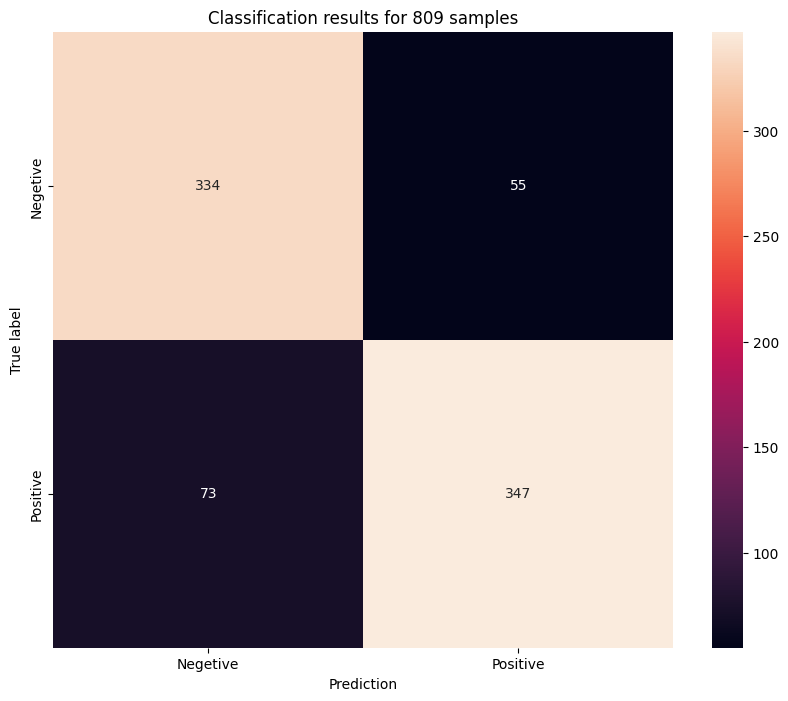

In [30]:
plot_confusion_mat(y_test, y_pred1)

Random Forest Classifier

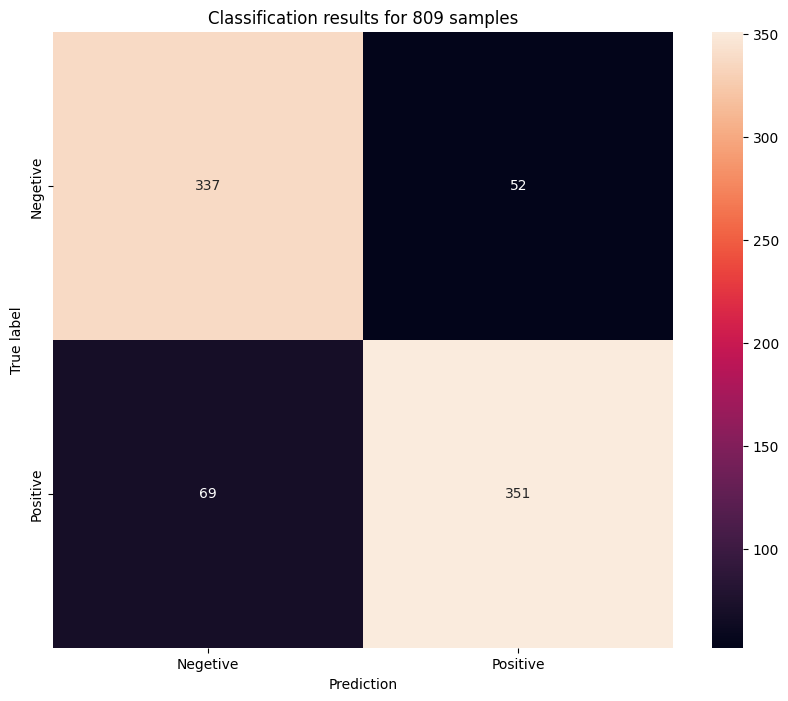

In [31]:
plot_confusion_mat(y_test, y_pred2)

Support Vector Machine

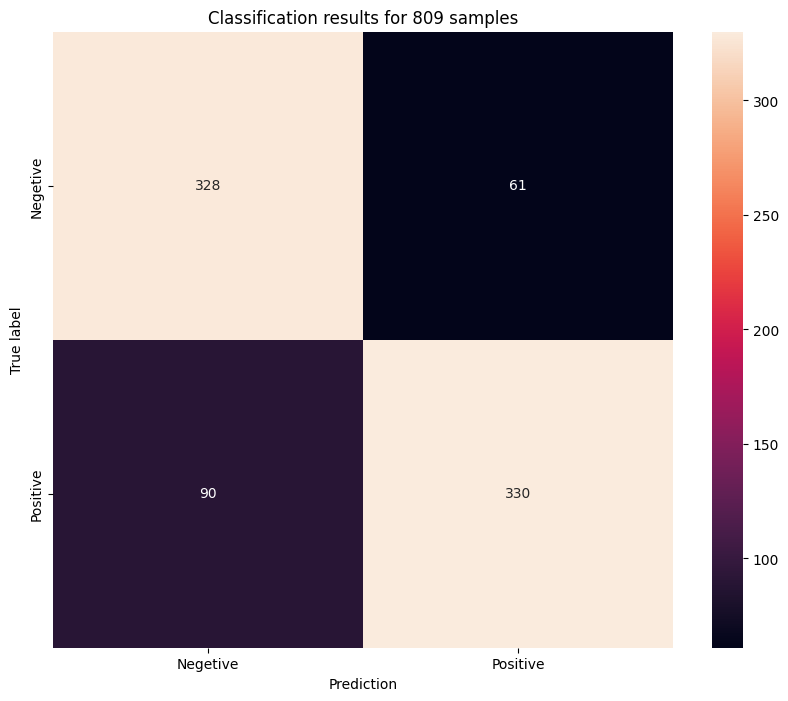

In [32]:
plot_confusion_mat(y_test, y_pred3)

Multi-Layer Perceptron Classifier

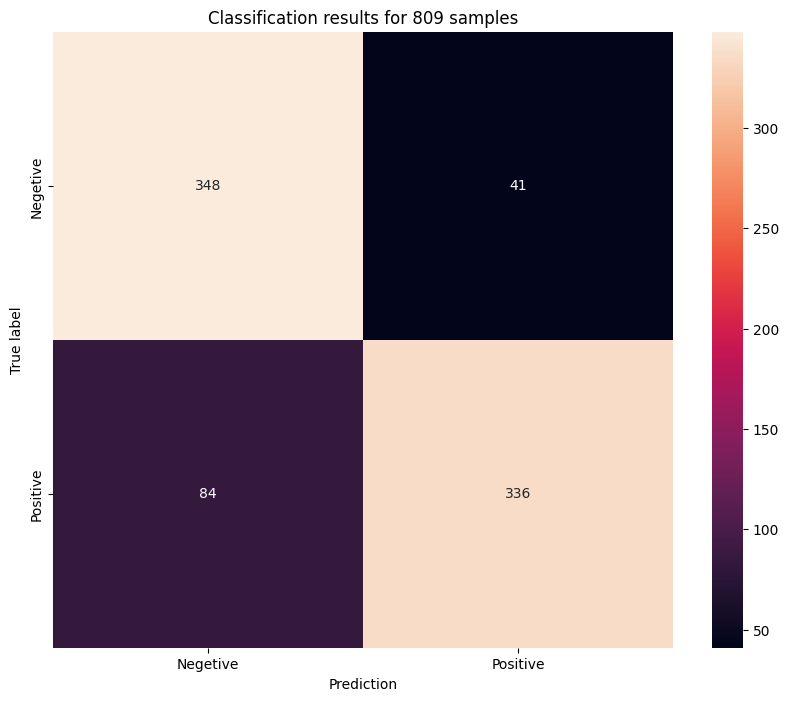

In [33]:
plot_confusion_mat(y_test, y_pred4)